Useremo [questo notebook](https://deepnote.com/workspace/Manuel-De-Luzi-55cedac2-2b61-44e5-afcc-980f52636d33/project/COPIA-4f3b8b3b-deda-48cc-bf19-acb27fc717de/notebook/House-Price-ef717677e5744074aabaad82be38eaf3) come reference.



In [74]:
# Import cluster of best articles
import pandas as pd
import numpy as np

pd.options.display.max_columns = None

articles  = pd.read_csv("df_with_engagement_differences.csv", encoding="latin-1")

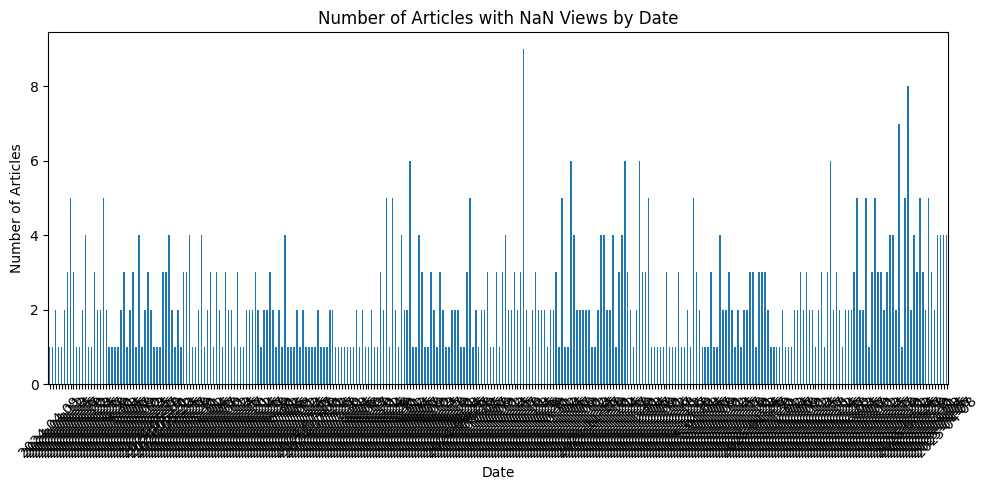

C:\Users\manuel.deluzi\AppData\Local\Temp\ipykernel_34824\2296171282.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  articles['views'].fillna(0, inplace=True)


In [75]:
# Compute the percentage of NaN for each column 
nan_percentage = articles.isnull().mean() * 100

nan_views = articles[articles['views'].isnull()][['title', 'category', 'active users', 'link', 'date']]
# Plot date on x axis and views on y axis of articles with nan views
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
nan_views['date'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Articles with NaN Views by Date')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Let's assume that the NaN values in the views column are due to the fact that the article generated no views at all.
# We can replace the NaN values with 0.

articles['views'].fillna(0, inplace=True)


## Missing values

In [76]:
# Fill nan views to 0
articles["views"].fillna(0, inplace=True)
# The same for active users
articles["active users"].fillna(0, inplace=True)

# Impute differences with the respective median value (benchmark) [benchmark - 0]
articles["diff_with_daily_benchmark_active users"].fillna(articles["daily_median_benchmark_active users"], inplace=True)
articles["diff_with_daily_benchmark_average engagement time per active user"].fillna(articles["daily_median_benchmark_average engagement time per active user"], inplace=True)


# Impute missing buckets for active users with 'Molto Basso'
articles["active_users_bucket"].fillna("Molto Basso", inplace=True)

# As we don't generate views for articles with no active users, we have no engagement data
# for these articles. 


C:\Users\manuel.deluzi\AppData\Local\Temp\ipykernel_34824\1027672655.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  articles["views"].fillna(0, inplace=True)
C:\Users\manuel.deluzi\AppData\Local\Temp\ipykernel_34824\1027672655.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [77]:
to_drop = [
    "views per active user",
    "date_active users",
    "post_views_count",
    "daily_median_benchmark_active users",
    "diff_with_daily_benchmark_active users",
    "daily_median_benchmark_average engagement time per active user",
    "diff_with_daily_benchmark_active users",
    "diff_with_daily_benchmark_average engagement time per active user",
    "post_views_count",
    "views",
    "active users",
    "date_average engagement time per active user",
    "average engagement time per active user",
    "link"
]

features = articles.drop(columns=to_drop)

features.columns

Index(['date', 'title', 'category', 'pagepath', 'pubdate', 'publication_tags',
       'active_users_bucket', 'engagement_bucket'],
      dtype='object')

In [78]:
features_cont = features.select_dtypes(include=[np.number]).columns
features_cat = features.select_dtypes(exclude=[np.number]).columns


In [83]:
articles

,date,title,link,category,pagepath,pubdate,post_views_count,views,publication_tags,average engagement time per active user,active users,views per active user,date_active users,daily_median_benchmark_active users,date_average engagement time per active user,daily_median_benchmark_average engagement time per active user,diff_with_daily_benchmark_active users,diff_with_daily_benchmark_average engagement time per active user,active_users_bucket,engagement_bucket
0,2024-04-09,"Cattivissimo me di Pierre Coffin, Chris Renaud...",https://www.taxidrivers.it/67349/film-da-veder...,Guide e Film da Vedere,/67349/film-da-vedere/cattivissimo-me-di-pierr...,2024-04-09 05:00:09+00:00,2635,10.0,"Cattivissimo me, Chris Renaud, Dana Gaier, Els...",10.666667,6.0,1.666667,2024-04-09,13.0,2024-04-09,21.857143,-7.0,-11.190476,Basso,Molto Basso
1,2024-04-09,Pusher di Nicolas Winding Refn,https://www.taxidrivers.it/77452/film-da-veder...,Guide e Film da Vedere,/77452/film-da-vedere/stasera-alle-2335-rai-mo...,2024-04-09 05:00:24+00:00,2958,15.0,"Kim Bodnia, Laura Drasbæk, Mads Mikkelsen, Nic...",13.200000,15.0,1.000000,2024-04-09,13.0,2024-04-09,21.857143,2.0,-8.657143,Medio,Basso
2,2024-04-09,Missing - Scomparso,https://www.taxidrivers.it/80104/film-da-veder...,Guide e Film da Vedere,/80104/film-da-vedere/stasera-alle-2330-la7-mi...,2024-04-09 05:00:57+00:00,4170,13.0,"Costa-Gavras, Jack Lemmon, Melanie Mayron, Mis...",12.555556,9.0,1.444444,2024-04-09,13.0,2024-04-09,21.857143,-4.0,-9.301587,Basso,Basso
3,2024-04-09,I migliori podcast italiani sul cinema che non...,https://www.taxidrivers.it/359630/magazine-2/i...,Speciali e Magazine,/359630/magazine-2/i-migliori-podcast-italiani...,2024-04-09 07:01:36+00:00,2389,588.0,"Cinema, Enrico Magrelli, Hollywood Party, PANO...",49.848411,409.0,1.437653,2024-04-09,13.0,2024-04-09,21.857143,396.0,27.991268,Molto Alto,Molto Alto
4,2024-04-09,'Another End' Conversazione con Piero Messina,https://www.taxidrivers.it/362834/interviews/c...,Interviste,/362834/interviews/conversation/another-end-co...,2024-04-09 06:15:04+00:00,594,64.0,"Another End, Carlo Cerofolini, CONVERSATIONS, ...",20.675676,37.0,1.729730,2024-04-09,13.0,2024-04-09,21.857143,24.0,-1.181467,Molto Alto,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6967,2025-04-08,"L'invenzione del ""cutoff"" spiegata da Artisti ...",https://www.taxidrivers.it/436725/latest-news/...,News,/436725/latest-news/l-invenzione-del-cutoff-sp...,2025-04-08 21:28:08+00:00,82,7.0,"Alberto Molinari, Alessandro Riceci, Artisti 7...",41.000000,5.0,1.400000,2025-04-08,7.0,2025-04-08,18.235294,-2.0,22.764706,Basso,Molto Alto
6968,2025-04-08,Il ritorno trionfale di Tom Cruise a Cannes co...,https://www.taxidrivers.it/436726/latest-news/...,News,/436726/latest-news/il-ritorno-trionfale-di-to...,2025-04-08 20:54:32+00:00,87,4.0,"Festival di Cannes, Mission Impossible ? The F...",9.750000,4.0,1.000000,2025-04-08,7.0,2025-04-08,18.235294,-3.0,-8.485294,Basso,Basso
6969,2025-04-08,'Come vendere droga online (in fretta)': dispo...,https://www.taxidrivers.it/436743/trailers/com...,Trailers,/436743/trailers/come-vendere-droga-online-in-...,2025-04-08 22:50:02+00:00,234,0.0,"Come vendere droga online (in fretta), lena kl...",NaN,0.0,NaN,2025-04-08,7.0,2025-04-08,18.235294,7.0,18.235294,Molto Basso,NaN
6970,2025-04-08,"Da Gabriella Carlucci ai Manetti Bros, i due g...",https://www.taxidrivers.it/436750/festival-di-...,Festival di Cinema,/436750/festival-di-cinema/eventi/da-gabriella...,2025-04-08 23:57:27+00:00,173,18.0,"Epica Etica Estetica dell?Immaginario, Gabriel...",28.666667,15.0,1.200000,2025-04-08,7.0,2025-04-08,18.235294,8.0,10.431373,Alto,Alto


### One-hot encoding categorical features

In [80]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
